In [99]:
import pandas as pd

In [100]:
BAYC = pd.read_csv("BAYC_3.csv", low_memory=False)
floor_price = pd.read_csv("BAYC_floor_price.csv", low_memory=False)
eth = pd.read_csv("ETH-USD.csv", low_memory=False)
opensea_volume = pd.read_csv("opensea_volume.csv", low_memory=False)

In [101]:
BAYC

,__indexer_id,__confirmed,__block_number,block_number,log_index,transaction_hash,timestamp,exchange_name,contract_version,aggregator_name,...,last_refreshed,__updated_block_number,collection_name,Background,Clothes,Earring,Eyes,Fur,Hat,Mouth
0,opensea-seaport-nft-sales-v2,VRAI,16889862,16889862,242,0x86911ca9920bb602a8f2e13beada5c95808b22b57ba5...,23/03/2023 13:11,opensea,seaport,NaN,...,04/02/2023 02:51,16137696,BoredApeYachtClub,Purple,Smoking Jacket,NaN,Closed,Dark Brown,Laurel Wreath,Phoneme Vuh
1,blur-nft-sales,VRAI,16889770,16889770,230,0x025c814c2c7d52a381cdc439be7b4d5a2dd6a1036f8f...,23/03/2023 12:53,blur,v1,NaN,...,28/01/2023 13:40,16137696,BoredApeYachtClub,Gray,Wool Turtleneck,NaN,Closed,Cream,Girl's Hair Pink,Bored Unshaven
2,opensea-seaport-nft-sales-v2,VRAI,16889312,16889312,169,0x096eabb44cb2f698053f37a599f69416516e45f8ba1e...,23/03/2023 11:20,opensea,seaport,NaN,...,28/01/2023 14:50,16137696,BoredApeYachtClub,Army Green,NaN,NaN,Heart,Tan,Irish Boho,Bored Unshaven Cigarette
3,opensea-seaport-nft-sales-v2,VRAI,16888859,16888859,565,0x11679c8098a37355d9d436c24d24dfb62eaaa89b3e22...,23/03/2023 09:47,opensea,seaport,NaN,...,28/01/2023 22:32,16137696,BoredApeYachtClub,Yellow,Work Vest,Gold Stud,Sleepy,Tan,Fez,Grin
4,x2y2-nft-sales,VRAI,16888523,16888523,173,0x92bd389411dbcd6691e24398b857baf25bd3467b458d...,23/03/2023 08:39,x2y2,v1,NaN,...,29/01/2023 07:47,16137696,BoredApeYachtClub,Orange,Black T,NaN,3d,Brown,NaN,Bored Unshaven
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33478,opensea-wyvern-nft-sales,VRAI,12345181,12345181,135,0x3c482aad0fa3f087afe00799905f3dbdccb683aaf78d...,01/05/2021 03:51,opensea,wyvern,NaN,...,28/01/2023 13:33,16137689,BoredApeYachtClub,Aquamarine,Work Vest,NaN,Sad,Cream,Seaman's Hat,Grin
33479,opensea-wyvern-nft-sales,VRAI,12345181,12345181,132,0xc5c7118fdac65a3a68d1b6a34d88068d954b58e75dd1...,01/05/2021 03:51,opensea,wyvern,NaN,...,05/02/2023 18:59,16137689,BoredApeYachtClub,New Punk Blue,Work Vest,NaN,Crazy,Brown,S&m Hat,Bored Unshaven Kazoo
33480,opensea-wyvern-nft-sales,VRAI,12345174,12345174,155,0x6c20d8a20bed7ebcf6dba6221e82ec8ce4b48dfa487b...,01/05/2021 03:50,opensea,wyvern,NaN,...,28/01/2023 21:13,16137689,BoredApeYachtClub,New Punk Blue,Sailor Shirt,NaN,Zombie,Tan,Beanie,Dumbfounded
33481,opensea-wyvern-nft-sales,VRAI,12345019,12345019,144,0x620f3257889feb7e58d552be4ab7662a97014fff5567...,01/05/2021 03:15,opensea,wyvern,NaN,...,28/01/2023 14:30,16137689,BoredApeYachtClub,Aquamarine,NaN,NaN,Bored,Black,Trippy Captain's Hat,Phoneme Oh


In [102]:
BAYC.keys()

Index(['__indexer_id', '__confirmed', '__block_number', 'block_number',
       'log_index', 'transaction_hash', 'timestamp', 'exchange_name',
       'contract_version', 'aggregator_name', 'contract_address', 'token_id',
       'is_multi_token_sale', 'multi_token_sale_index', 'price', 'usd_price',
       'eth_price', 'native_price', 'payment_token_address', 'quantity',
       'seller_address', 'buyer_address', 'royalty_fee', 'platform_fee',
       'minted_timestamp', 'supply', 'name', 'description', 'image_url',
       'external_url', 'media_url', 'properties', 'metadata_url',
       'last_refreshed', '__updated_block_number', 'collection_name',
       'Background', 'Clothes', 'Earring', 'Eyes', 'Fur', 'Hat', 'Mouth'],
      dtype='object')

In [103]:
BAYC.describe()["usd_price"]

count    3.348300e+04
mean     8.364069e+04
std      1.220463e+05
min      6.611481e-07
25%      3.293835e+03
50%      1.835633e+04
75%      1.242166e+05
max      2.922371e+06
Name: usd_price, dtype: float64

In [104]:
BAYC_background = BAYC[['usd_price', 'Background']]

# Définir les intervalles et les étiquettes correspondantes
intervals = [-float('inf'), 3.293835e+03, 1.835633e+04, 1.242166e+05, float('inf')]
labels = ['price_category_1', 'price_category_2', 'price_category_3', 'price_category_4']

# Créer la nouvelle colonne "price_category" en catégorisant les prix
BAYC_background['price_category'] = pd.cut(BAYC_background['usd_price'], bins=intervals, labels=labels, right=False)

tableau_contingence_background = pd.crosstab(BAYC_background["Background"], BAYC_background["price_category"])
tableau_contingence_background

C:\Users\tom36\AppData\Local\Temp\ipykernel_16372\3222848365.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BAYC_background['price_category'] = pd.cut(BAYC_background['usd_price'], bins=intervals, labels=labels, right=False)


price_category,price_category_1,price_category_2,price_category_3,price_category_4
Background,,,,
Aquamarine,1058,1061,1083,1128
Army Green,1037,1010,1149,1060
Blue,1019,984,1085,996
Gray,961,968,954,1017
New Punk Blue,1053,1054,968,1000
Orange,1078,1056,1015,1066
Purple,1088,1122,1041,1064
Yellow,1077,1115,1076,1040


In [105]:
tableau_contingence_background.to_csv("tableau_contingence_background.csv", header=True, index=True)

In [106]:
BAYC_clothes = BAYC[['usd_price', 'Clothes']]

# Définir les intervalles et les étiquettes correspondantes
intervals = [-float('inf'), 3.293835e+03, 1.835633e+04, 1.242166e+05, float('inf')]
labels = ['price_category_1', 'price_category_2', 'price_category_3', 'price_category_4']

# Créer la nouvelle colonne "price_category" en catégorisant les prix
BAYC_clothes['price_category'] = pd.cut(BAYC_background['usd_price'], bins=intervals, labels=labels, right=False)

tableau_contingence_clothes = pd.crosstab(BAYC_clothes["Clothes"], BAYC_clothes["price_category"])
tableau_contingence_clothes

C:\Users\tom36\AppData\Local\Temp\ipykernel_16372\1586363162.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BAYC_clothes['price_category'] = pd.cut(BAYC_background['usd_price'], bins=intervals, labels=labels, right=False)


price_category,price_category_1,price_category_2,price_category_3,price_category_4
Clothes,,,,
Admirals Coat,27,44,14,29
Bandolier,145,126,161,159
Bayc T Black,179,163,139,130
Bayc T Red,114,93,72,89
Biker Vest,238,257,289,207
Black Holes T,164,159,178,193
Black Suit,2,22,21,21
Black T,280,298,202,240
Blue Dress,79,106,130,76


In [107]:
tableau_contingence_clothes.to_csv("tableau_contingence_clothes.csv", header=True, index=True)

In [108]:
BAYC_earring = BAYC[['usd_price', 'Earring']]

# Définir les intervalles et les étiquettes correspondantes
intervals = [-float('inf'), 3.293835e+03, 1.835633e+04, 1.242166e+05, float('inf')]
labels = ['price_category_1', 'price_category_2', 'price_category_3', 'price_category_4']

# Créer la nouvelle colonne "price_category" en catégorisant les prix
BAYC_earring['price_category'] = pd.cut(BAYC_background['usd_price'], bins=intervals, labels=labels, right=False)

tableau_contingence_earring = pd.crosstab(BAYC_earring["Earring"], BAYC_earring["price_category"])
tableau_contingence_earring

C:\Users\tom36\AppData\Local\Temp\ipykernel_16372\2041493935.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BAYC_earring['price_category'] = pd.cut(BAYC_background['usd_price'], bins=intervals, labels=labels, right=False)


price_category,price_category_1,price_category_2,price_category_3,price_category_4
Earring,,,,
Cross,96,102,49,112
Diamond Stud,159,141,93,147
Gold Hoop,368,394,324,366
Gold Stud,317,334,310,357
Silver Hoop,734,771,709,788
Silver Stud,696,645,668,732


In [109]:
tableau_contingence_earring.to_csv("tableau_contingence_earring.csv", header=True, index=True)

In [110]:
BAYC_eyes = BAYC[['usd_price', 'Eyes']]

# Définir les intervalles et les étiquettes correspondantes
intervals = [-float('inf'), 3.293835e+03, 1.835633e+04, 1.242166e+05, float('inf')]
labels = ['price_category_1', 'price_category_2', 'price_category_3', 'price_category_4']

# Créer la nouvelle colonne "price_category" en catégorisant les prix
BAYC_eyes['price_category'] = pd.cut(BAYC_background['usd_price'], bins=intervals, labels=labels, right=False)

tableau_contingence_eyes = pd.crosstab(BAYC_eyes["Eyes"], BAYC_eyes["price_category"])
tableau_contingence_eyes

C:\Users\tom36\AppData\Local\Temp\ipykernel_16372\906879166.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BAYC_eyes['price_category'] = pd.cut(BAYC_background['usd_price'], bins=intervals, labels=labels, right=False)


price_category,price_category_1,price_category_2,price_category_3,price_category_4
Eyes,,,,
3d,336,372,324,385
Angry,380,371,355,350
Blindfold,239,236,271,230
Bloodshot,713,634,699,750
Blue Beams,5,26,23,22
Bored,1517,1372,1243,1403
Closed,685,667,827,611
Coins,419,455,509,454
Crazy,367,458,681,501


In [111]:
tableau_contingence_eyes.to_csv("tableau_contingence_eyes.csv", header=True, index=True)

In [112]:
BAYC_fur = BAYC[['usd_price', 'Fur']]

# Définir les intervalles et les étiquettes correspondantes
intervals = [-float('inf'), 3.293835e+03, 1.835633e+04, 1.242166e+05, float('inf')]
labels = ['price_category_1', 'price_category_2', 'price_category_3', 'price_category_4']

# Créer la nouvelle colonne "price_category" en catégorisant les prix
BAYC_fur['price_category'] = pd.cut(BAYC_fur['usd_price'], bins=intervals, labels=labels, right=False)

tableau_contingence_fur = pd.crosstab(BAYC_fur["Fur"], BAYC_fur["price_category"])
tableau_contingence_fur

C:\Users\tom36\AppData\Local\Temp\ipykernel_16372\3156761604.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BAYC_fur['price_category'] = pd.cut(BAYC_fur['usd_price'], bins=intervals, labels=labels, right=False)


price_category,price_category_1,price_category_2,price_category_3,price_category_4
Fur,,,,
Black,1156,1089,1109,1169
Blue,428,395,293,355
Brown,1230,1164,1327,1238
Cheetah,318,250,188,292
Cream,588,592,744,599
Dark Brown,1179,1184,1211,1135
Death Bot,96,119,78,117
Dmt,108,166,105,140
Golden Brown,689,668,734,698


In [113]:
tableau_contingence_fur.to_csv("tableau_contingence_fur.csv", header=True, index=True)

In [114]:
BAYC_hat = BAYC[['usd_price', 'Hat']]

# Définir les intervalles et les étiquettes correspondantes
intervals = [-float('inf'), 3.293835e+03, 1.835633e+04, 1.242166e+05, float('inf')]
labels = ['price_category_1', 'price_category_2', 'price_category_3', 'price_category_4']

# Créer la nouvelle colonne "price_category" en catégorisant les prix
BAYC_hat['price_category'] = pd.cut(BAYC_hat['usd_price'], bins=intervals, labels=labels, right=False)

tableau_contingence_hat = pd.crosstab(BAYC_hat["Hat"], BAYC_hat["price_category"])
tableau_contingence_hat

C:\Users\tom36\AppData\Local\Temp\ipykernel_16372\2604442624.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BAYC_hat['price_category'] = pd.cut(BAYC_hat['usd_price'], bins=intervals, labels=labels, right=False)


price_category,price_category_1,price_category_2,price_category_3,price_category_4
Hat,,,,
Army Hat,286,260,216,271
Baby's Bonnet,157,133,161,149
Bandana Blue,56,70,60,58
Bayc Flipped Brim,157,151,85,120
Bayc Hat Black,146,159,98,177
Bayc Hat Red,79,72,63,78
Beanie,500,503,482,440
Bowler,210,220,167,203
Bunny Ears,160,133,157,138


In [115]:
tableau_contingence_hat.to_csv("tableau_contingence_hat.csv", header=True, index=True)

In [116]:
BAYC_mouth = BAYC[['usd_price', 'Mouth']]

# Définir les intervalles et les étiquettes correspondantes
intervals = [-float('inf'), 3.293835e+03, 1.835633e+04, 1.242166e+05, float('inf')]
labels = ['price_category_1', 'price_category_2', 'price_category_3', 'price_category_4']

# Créer la nouvelle colonne "price_category" en catégorisant les prix
BAYC_mouth['price_category'] = pd.cut(BAYC_mouth['usd_price'], bins=intervals, labels=labels, right=False)

tableau_contingence_mouth = pd.crosstab(BAYC_mouth["Mouth"], BAYC_mouth["price_category"])
tableau_contingence_mouth

C:\Users\tom36\AppData\Local\Temp\ipykernel_16372\2737321212.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BAYC_mouth['price_category'] = pd.cut(BAYC_mouth['usd_price'], bins=intervals, labels=labels, right=False)


price_category,price_category_1,price_category_2,price_category_3,price_category_4
Mouth,,,,
Bored,2080,1942,1803,1924
Bored Bubblegum,57,89,90,61
Bored Cigar,81,79,60,87
Bored Cigarette,635,513,484,625
Bored Dagger,15,45,22,29
Bored Kazoo,41,64,51,50
Bored Party Horn,40,65,60,70
Bored Pipe,92,89,81,75
Bored Pizza,7,44,25,19


In [117]:
tableau_contingence_mouth.to_csv("tableau_contingence_mouth.csv", header=True, index=True)

In [118]:
BAYC['royalty_fee']

0        0.31350
1        0.28555
2        0.29500
3        0.29500
4        0.00000
          ...   
33478    0.00200
33479    0.00200
33480    0.00200
33481    0.00250
33482    0.00400
Name: royalty_fee, Length: 33483, dtype: float64

In [88]:
BAYC['platform_fee']

0        0.0000
1        0.0000
2        0.0000
3        0.0000
4        0.0000
          ...  
33478    0.0020
33479    0.0020
33480    0.0020
33481    0.0025
33482    0.0040
Name: platform_fee, Length: 33483, dtype: float64

In [89]:
BAYC_dates = BAYC[["timestamp"]]
BAYC_dates['Date'] = pd.to_datetime(BAYC_dates['timestamp'], format='%d/%m/%Y %H:%M')
BAYC_dates['Date'] = BAYC_dates['Date'].dt.strftime('%d/%m/%Y')
BAYC_dates = BAYC_dates[['Date']]
BAYC_2 = pd.concat([BAYC_dates, BAYC[["usd_price", "token_id", "royalty_fee", "platform_fee"]]], axis=1)
BAYC_2.index = BAYC_2["Date"]
BAYC_2.index = pd.to_datetime(BAYC_2.index, format="%d/%m/%Y")
BAYC_2 = BAYC_2[["usd_price", "token_id", "royalty_fee", "platform_fee", "Date"]]
BAYC_2

C:\Users\tom36\AppData\Local\Temp\ipykernel_16792\902182081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BAYC_dates['Date'] = pd.to_datetime(BAYC_dates['timestamp'], format='%d/%m/%Y %H:%M')
C:\Users\tom36\AppData\Local\Temp\ipykernel_16792\902182081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BAYC_dates['Date'] = BAYC_dates['Date'].dt.strftime('%d/%m/%Y')


,usd_price,token_id,royalty_fee,platform_fee,Date
Date,,,,,
2023-03-23,109913.10,4838,0.31350,0.0000,23/03/2023
2023-03-23,100375.96,1576,0.28555,0.0000,23/03/2023
2023-03-23,103684.24,7875,0.29500,0.0000,23/03/2023
2023-03-23,103490.72,9467,0.29500,0.0000,23/03/2023
2023-03-23,107072.69,7200,0.00000,0.0000,23/03/2023
...,...,...,...,...,...
2021-05-01,221.77,551,0.00200,0.0020,01/05/2021
2021-05-01,221.77,665,0.00200,0.0020,01/05/2021
2021-05-01,221.98,554,0.00200,0.0020,01/05/2021


In [90]:
BAYC_2 = BAYC_2.set_axis(["usd_price", "token_id", "royalty_fee", "platform_fee", "time"], axis=1)

In [91]:
BAYC_2

,usd_price,token_id,royalty_fee,platform_fee,time
Date,,,,,
2023-03-23,109913.10,4838,0.31350,0.0000,23/03/2023
2023-03-23,100375.96,1576,0.28555,0.0000,23/03/2023
2023-03-23,103684.24,7875,0.29500,0.0000,23/03/2023
2023-03-23,103490.72,9467,0.29500,0.0000,23/03/2023
2023-03-23,107072.69,7200,0.00000,0.0000,23/03/2023
...,...,...,...,...,...
2021-05-01,221.77,551,0.00200,0.0020,01/05/2021
2021-05-01,221.77,665,0.00200,0.0020,01/05/2021
2021-05-01,221.98,554,0.00200,0.0020,01/05/2021


In [92]:
eth = pd.read_csv("ETH-USD.csv")   
eth = eth[['Date', 'Open']]
eth['Date'] = pd.to_datetime(eth['Date'], format='%Y-%m-%d')
eth['Date'] = eth['Date'].dt.strftime('%d/%m/%Y')
eth.index = eth["Date"]
eth.index = pd.to_datetime(eth.index, format="%d/%m/%Y")
eth = eth[["Open"]]
eth

,Open
Date,
2017-11-09,308.644989
2017-11-10,320.670990
2017-11-11,298.585999
2017-11-12,314.690002
2017-11-13,307.024994
...,...
2023-04-20,1936.417969
2023-04-21,1943.409912
2023-04-22,1849.286499


In [93]:
volume = pd.read_csv('opensea_volume.csv')      
volume['time'] = pd.to_datetime(volume['time'], format='%Y-%m-%d %H:%M:%S.%f UTC')
volume['time'] = volume['time'].dt.strftime('%d/%m/%Y')
volume.index = volume["time"]
volume.index = pd.to_datetime(volume.index, format="%d/%m/%Y")
volume.index.name = "Date"
volume = volume[["vol_usd"]]
volume

,vol_usd
Date,
2020-02-26,3.274857e+04
2021-11-18,8.182734e+07
2018-09-21,1.063960e+03
2019-02-24,1.509694e+04
2020-12-24,1.447907e+05
...,...
2022-05-14,6.053263e+07
2022-01-11,1.195752e+08
2021-11-29,1.062206e+08


In [94]:
BAYC_eth = pd.merge(BAYC_2, eth, on='Date', how='left')

In [95]:
BAYC_eth

,usd_price,token_id,royalty_fee,platform_fee,time,Open
Date,,,,,,
2023-03-23,109913.10,4838,0.31350,0.0000,23/03/2023,1737.140869
2023-03-23,100375.96,1576,0.28555,0.0000,23/03/2023,1737.140869
2023-03-23,103684.24,7875,0.29500,0.0000,23/03/2023,1737.140869
2023-03-23,103490.72,9467,0.29500,0.0000,23/03/2023,1737.140869
2023-03-23,107072.69,7200,0.00000,0.0000,23/03/2023,1737.140869
...,...,...,...,...,...,...
2021-05-01,221.77,551,0.00200,0.0020,01/05/2021,2772.838379
2021-05-01,221.77,665,0.00200,0.0020,01/05/2021,2772.838379
2021-05-01,221.98,554,0.00200,0.0020,01/05/2021,2772.838379


In [96]:
BAYC_eth_volume = pd.merge(BAYC_eth, volume, on='Date', how='left')

In [97]:
BAYC_eth_volume

,usd_price,token_id,royalty_fee,platform_fee,time,Open,vol_usd
Date,,,,,,,
2023-03-23,109913.10,4838,0.31350,0.0000,23/03/2023,1737.140869,8.424872e+06
2023-03-23,100375.96,1576,0.28555,0.0000,23/03/2023,1737.140869,8.424872e+06
2023-03-23,103684.24,7875,0.29500,0.0000,23/03/2023,1737.140869,8.424872e+06
2023-03-23,103490.72,9467,0.29500,0.0000,23/03/2023,1737.140869,8.424872e+06
2023-03-23,107072.69,7200,0.00000,0.0000,23/03/2023,1737.140869,8.424872e+06
...,...,...,...,...,...,...,...
2021-05-01,221.77,551,0.00200,0.0020,01/05/2021,2772.838379,2.852417e+06
2021-05-01,221.77,665,0.00200,0.0020,01/05/2021,2772.838379,2.852417e+06
2021-05-01,221.98,554,0.00200,0.0020,01/05/2021,2772.838379,2.852417e+06


In [98]:
BAYC_eth_volume = BAYC_eth_volume.set_axis(['prix_vente', 'token_id', "frais_royalty", "frais_platforme",'time','prix_eth', 'volume_opensea',], axis=1)

In [99]:
BAYC_eth_volume

,prix_vente,token_id,frais_royalty,frais_platforme,time,prix_eth,volume_opensea
Date,,,,,,,
2023-03-23,109913.10,4838,0.31350,0.0000,23/03/2023,1737.140869,8.424872e+06
2023-03-23,100375.96,1576,0.28555,0.0000,23/03/2023,1737.140869,8.424872e+06
2023-03-23,103684.24,7875,0.29500,0.0000,23/03/2023,1737.140869,8.424872e+06
2023-03-23,103490.72,9467,0.29500,0.0000,23/03/2023,1737.140869,8.424872e+06
2023-03-23,107072.69,7200,0.00000,0.0000,23/03/2023,1737.140869,8.424872e+06
...,...,...,...,...,...,...,...
2021-05-01,221.77,551,0.00200,0.0020,01/05/2021,2772.838379,2.852417e+06
2021-05-01,221.77,665,0.00200,0.0020,01/05/2021,2772.838379,2.852417e+06
2021-05-01,221.98,554,0.00200,0.0020,01/05/2021,2772.838379,2.852417e+06


In [100]:
import seaborn as sns

C:\Users\tom36\AppData\Local\Temp\ipykernel_16792\2593894916.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = BAYC_eth_volume.corr()


<Axes: >

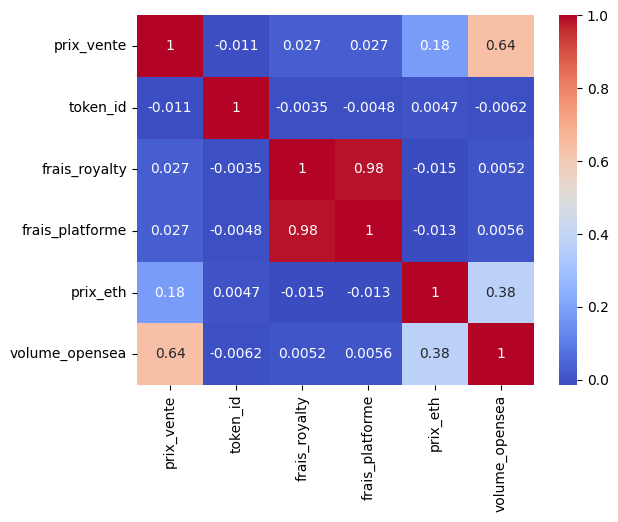

In [101]:
corr_matrix = BAYC_eth_volume.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [102]:
traits =  BAYC[["Background", "Clothes", "Earring", "Eyes", "Fur", "Hat", "Mouth"]]

one_hot = pd.get_dummies(traits, columns=["Background", "Clothes", "Earring", "Eyes", "Fur", "Hat", "Mouth"])

In [103]:
one_hot = one_hot.reset_index(drop=True)
one_hot

,Background_Aquamarine,Background_Army Green,Background_Blue,Background_Gray,Background_New Punk Blue,Background_Orange,Background_Purple,Background_Yellow,Clothes_Admirals Coat,Clothes_Bandolier,...,Mouth_Grin Multicolored,Mouth_Jovial,Mouth_Phoneme ooo,Mouth_Phoneme L,Mouth_Phoneme Oh,Mouth_Phoneme Vuh,Mouth_Phoneme Wah,Mouth_Rage,Mouth_Small Grin,Mouth_Tongue Out
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33478,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33479,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33480,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33481,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [104]:
nb_traits = pd.DataFrame()
nb_traits['nb_traits'] = one_hot.sum(axis=1)

In [105]:
nb_traits

,nb_traits
0,6
1,6
2,5
3,7
4,5
...,...
33478,6
33479,6
33480,6
33481,5


In [106]:
BAYC_eth_volume_trait = pd.concat([BAYC_eth_volume.reset_index(drop=True), nb_traits], axis=1)
BAYC_eth_volume_trait

,prix_vente,token_id,frais_royalty,frais_platforme,time,prix_eth,volume_opensea,nb_traits
0,109913.10,4838,0.31350,0.0000,23/03/2023,1737.140869,8.424872e+06,6
1,100375.96,1576,0.28555,0.0000,23/03/2023,1737.140869,8.424872e+06,6
2,103684.24,7875,0.29500,0.0000,23/03/2023,1737.140869,8.424872e+06,5
3,103490.72,9467,0.29500,0.0000,23/03/2023,1737.140869,8.424872e+06,7
4,107072.69,7200,0.00000,0.0000,23/03/2023,1737.140869,8.424872e+06,5
...,...,...,...,...,...,...,...,...
33478,221.77,551,0.00200,0.0020,01/05/2021,2772.838379,2.852417e+06,6
33479,221.77,665,0.00200,0.0020,01/05/2021,2772.838379,2.852417e+06,6
33480,221.98,554,0.00200,0.0020,01/05/2021,2772.838379,2.852417e+06,6
33481,276.81,586,0.00250,0.0025,01/05/2021,2772.838379,2.852417e+06,5


In [107]:
BAYC_eth_volume_trait['time'] = pd.to_datetime(BAYC_eth_volume_trait['time'], format='%d/%m/%Y')
BAYC_eth_volume_trait['time'] = BAYC_eth_volume_trait['time'].dt.strftime('%d/%m/%Y')
BAYC_eth_volume_trait.index = BAYC_eth_volume_trait["time"]
BAYC_eth_volume_trait.index = pd.to_datetime(BAYC_eth_volume_trait.index, format="%d/%m/%Y")
BAYC_eth_volume_trait

,prix_vente,token_id,frais_royalty,frais_platforme,time,prix_eth,volume_opensea,nb_traits
time,,,,,,,,
2023-03-23,109913.10,4838,0.31350,0.0000,23/03/2023,1737.140869,8.424872e+06,6
2023-03-23,100375.96,1576,0.28555,0.0000,23/03/2023,1737.140869,8.424872e+06,6
2023-03-23,103684.24,7875,0.29500,0.0000,23/03/2023,1737.140869,8.424872e+06,5
2023-03-23,103490.72,9467,0.29500,0.0000,23/03/2023,1737.140869,8.424872e+06,7
2023-03-23,107072.69,7200,0.00000,0.0000,23/03/2023,1737.140869,8.424872e+06,5
...,...,...,...,...,...,...,...,...
2021-05-01,221.77,551,0.00200,0.0020,01/05/2021,2772.838379,2.852417e+06,6
2021-05-01,221.77,665,0.00200,0.0020,01/05/2021,2772.838379,2.852417e+06,6
2021-05-01,221.98,554,0.00200,0.0020,01/05/2021,2772.838379,2.852417e+06,6


In [108]:
BAYC_eth_volume_trait = BAYC_eth_volume_trait.drop('time', axis=1)

In [109]:
BAYC_eth_volume_trait = BAYC_eth_volume_trait.drop('token_id', axis=1)

In [110]:
BAYC_eth_volume_trait

,prix_vente,frais_royalty,frais_platforme,prix_eth,volume_opensea,nb_traits
time,,,,,,
2023-03-23,109913.10,0.31350,0.0000,1737.140869,8.424872e+06,6
2023-03-23,100375.96,0.28555,0.0000,1737.140869,8.424872e+06,6
2023-03-23,103684.24,0.29500,0.0000,1737.140869,8.424872e+06,5
2023-03-23,103490.72,0.29500,0.0000,1737.140869,8.424872e+06,7
2023-03-23,107072.69,0.00000,0.0000,1737.140869,8.424872e+06,5
...,...,...,...,...,...,...
2021-05-01,221.77,0.00200,0.0020,2772.838379,2.852417e+06,6
2021-05-01,221.77,0.00200,0.0020,2772.838379,2.852417e+06,6
2021-05-01,221.98,0.00200,0.0020,2772.838379,2.852417e+06,6


In [111]:
BAYC_eth_volume_trait.to_csv("BAYC_eth_volume_trait.csv", header=True, index=False)

In [82]:
BAYC_eth_volume = BAYC_eth_volume_trait[["prix_vente", "token_id", "prix_eth", "volume_opensea"]]

KeyError: "['token_id'] not in index"

In [ ]:
BAYC_eth_volume

In [72]:
BAYC_eth_volume.to_csv("BAYC_eth_volume.csv", header=True, index=False)

In [78]:
list(BAYC_eth_volume_trait.keys())

['prix_vente',
 'token_id',
 'prix_eth',
 'volume_opensea',
 'Background_Aquamarine',
 'Background_Army Green',
 'Background_Blue',
 'Background_Gray',
 'Background_New Punk Blue',
 'Background_Orange',
 'Background_Purple',
 'Background_Yellow',
 'Clothes_Admirals Coat',
 'Clothes_Bandolier',
 'Clothes_Bayc T Black',
 'Clothes_Bayc T Red',
 'Clothes_Biker Vest',
 'Clothes_Black Holes T',
 'Clothes_Black Suit',
 'Clothes_Black T',
 'Clothes_Blue Dress',
 'Clothes_Bone Necklace',
 'Clothes_Bone Tee',
 'Clothes_Caveman Pelt',
 'Clothes_Cowboy Shirt',
 'Clothes_Guayabera',
 'Clothes_Hawaiian',
 'Clothes_Hip Hop',
 'Clothes_Kings Robe',
 'Clothes_Lab Coat',
 'Clothes_Leather Jacket',
 'Clothes_Leather Punk Jacket',
 'Clothes_Lumberjack Shirt',
 'Clothes_Navy Striped Tee',
 'Clothes_Pimp Coat',
 'Clothes_Prison Jumpsuit',
 'Clothes_Prom Dress',
 'Clothes_Puffy Vest',
 'Clothes_Rainbow Suspenders',
 'Clothes_Sailor Shirt',
 'Clothes_Service',
 'Clothes_Sleeveless Logo T',
 'Clothes_Sleeveles

NameError: name 'let' is not defined